# Question.2.

1. Create the following table using the sample dataset provided, programmatically. Clean the
dataset if needed.
2. Whether any inference could be reasoned out from the dataset.
3. Use any machine learning algorithm(s) to predict the Feedback. Reason out your choices. (Don't
worry too much about the accuracy). (Please specify the criteria for selection of machine learning
algorithm for solving the problem)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df=pd.read_csv("SampleData.xlsx - SampleData1.csv")
df2=pd.read_csv("SampleData.xlsx - SampleData2.csv")

In [3]:
df.shape,df2.shape
df2=df2.drop("Unnamed: 0",axis=1)

In [4]:
df.shape,df2.shape

((64, 8), (99, 2))

In [5]:
df=pd.merge(df,df2,how="left",on="Id").drop("Unnamed: 0",axis=1)

In [6]:
tb1=pd.crosstab(df["Type"],df["User"])
tb1["Total"]=tb1.sum(axis=1)
tb1

User,A1001,A1002,A1003,A1004,A1005,Total
Type,,,,,,
Call,3,0,1,3,0,7
Email,3,10,2,1,3,19
Update,11,3,19,4,0,37
Visit,1,0,0,0,0,1


In [7]:
df.head()

,Id,Type,Date,CountA,CountB,CountC,FeedBack,User
0,10121,Email,8/4/16 10:16,0.782742,0.510799,0.452150,Others,A1005
1,10122,Email,8/4/16 10:18,0.229017,0.300863,0.102294,Others,A1002
2,10123,Email,8/4/16 10:30,0.954765,0.432080,0.531254,Others,A1002
3,10124,Email,8/4/16 10:41,0.044002,0.989621,0.420642,Others,A1002
4,10125,Email,8/4/16 10:59,0.902472,0.304069,0.201665,Others,A1002


In [8]:
#1. Create the following table using the sample dataset provided, programmatically. Clean the dataset if needed.

#Data set cleaning
df.shape
df["Id"].value_counts()  # ID 10127 has occured twice
df["Type"].value_counts()  # Update was the highest mode of communication
df["FeedBack"].value_counts() # Need to change values in Feedback column

Others        29
NC            15
nc            13
UNDECIDED      2
Undecided      2
NI             1
undecided      1
undecided      1
Name: FeedBack, dtype: int64

In [9]:
for i in df["FeedBack"].value_counts().index:
    print(i,len(i))

Others 6
NC 2
nc 2
UNDECIDED 9
Undecided 9
NI 2
undecided  10
undecided 9


In [10]:
def feed(i):
    if i in ["UNDECIDED","Undecided","undecided","undecided "]:
        return "UND"
    elif i in ["nc","NC"]:
        return "NC"
    elif i=="Others":
        return "Others"
    elif i=="NI":
        return "NI"


In [11]:
df["FeedBack"]=df["FeedBack"].apply(feed)

In [12]:
df.isnull().sum()
df=df.sort_values(["User","Date"]) #We have data for the same Date from morning 10 am to 7pm in the evening and just 5 users
df.loc[df["FeedBack"].isnull()]  #Data is missing for user A1003 and A1002
df.loc[(df["User"]=="A1002")&(df["Id"]==10127)] # User A1002 has contacted lead 10127 via Email 2/4 times at the same time.
#Looks like he/she sent multiple emails in the same instant.So let's fill in Email

#Also
pd.crosstab(df["Type"],df["FeedBack"]) #Email is the most frequent mode of communication where 
#the feedback belongs to others category
df.loc[df["Type"].isnull(),"Type"]="Email"

In [13]:
df.loc[df["FeedBack"].isnull()]  # For both rows containing missing values in Feedback, 
#the mode of communication was through Update
pd.crosstab(df["FeedBack"],df["Type"])  #For mode of communication through update, the mode for Feedback is NC
df.loc[df["FeedBack"].isnull(),"FeedBack"]="NC" #Fill missing value

<AxesSubplot:xlabel='Type'>

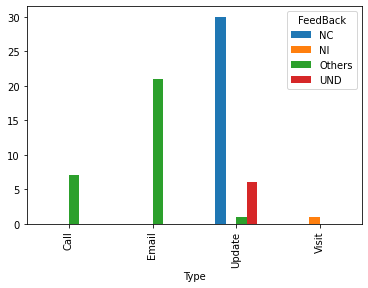

In [14]:
df.isnull().sum()
#df.groupby("User")[["CountA","CountB","CountC"]].mean().plot(kind="bar")
#pd.crosstab(df["User"],df["Email"]).plot(kind="bar")
#df.groupby("User")[["Email","Update","Visit"]].mean().plot(kind="bar")
#Email and Update were most frequent modes of communication. 
#A1005 and A1002 relied almost solely on Email to communicate with leads
#df.loc[df["User"]=="A1003"]["FeedBack"].value_counts()
#df.groupby(["User","Type"])["FeedBack"].max().plot(kind="bar")
df.FeedBack.value_counts()
pd.crosstab(df["Type"],df["FeedBack"]).plot(kind="bar")
#Most of the people who could not be contacted were communicated via update. Therefore update doesnt seem as an effective
#mode of communication

<AxesSubplot:xlabel='User'>

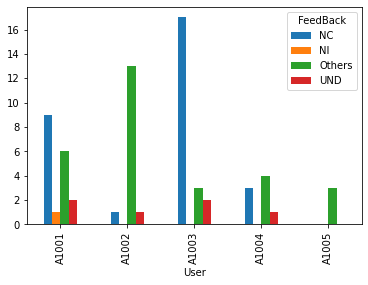

In [15]:
pd.crosstab(df["User"],df["FeedBack"]).plot(kind="bar")
#User 3 and 1 are yet to contact many leads.

In [16]:
df=pd.concat([df,pd.get_dummies(df["Type"],drop_first=True)],axis=1).drop(["Type","Id","Date"],axis=1)

In [17]:
df["FeedBack"].value_counts() #To convert it into a binary classification problem 
#we can roughly categorize people as contacted(1) or not contacted(0).
def target(i):
    if i=="NC":
        return 0
    else:
        return 1
    
df["FeedBack"]=df["FeedBack"].apply(target)

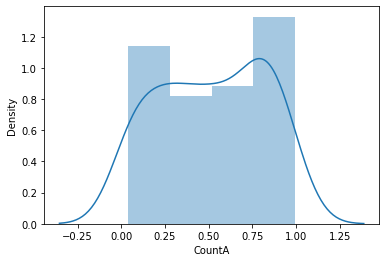

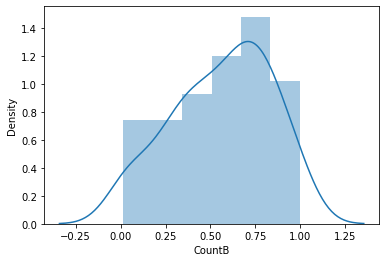

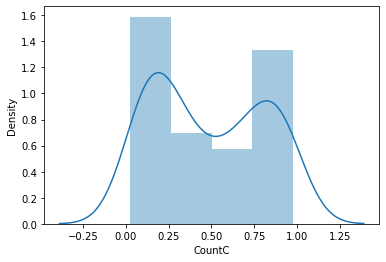

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ["CountA","CountB","CountC"]:
    plt.tight_layout()
    sns.distplot(df[i])
    plt.show()
    
#Scaling not needed as all 3 variables have values between 0 and 1

<AxesSubplot:>

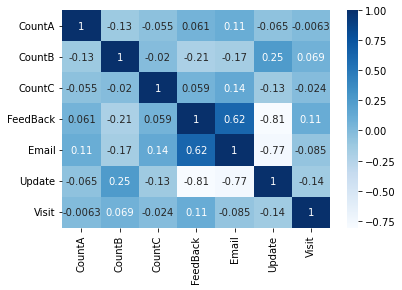

In [19]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")
#there seems to be a moderate correlation between email(independent) and Feedback (dependent) variable which is good for our model.
#On the other hand there is no multicollinearity within the data since no two independent variables have high correlation
#among themselves

In [20]:
df=df.drop("User",axis=1)

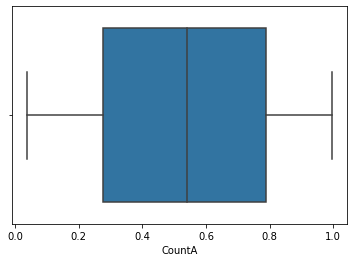

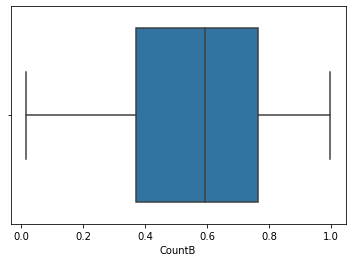

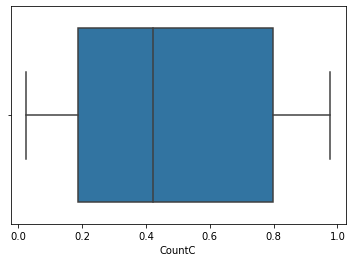

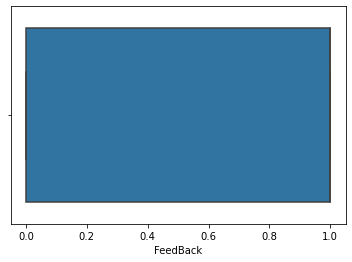

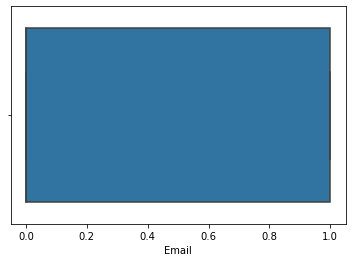

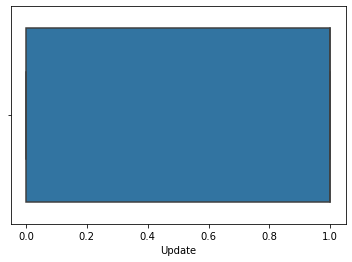

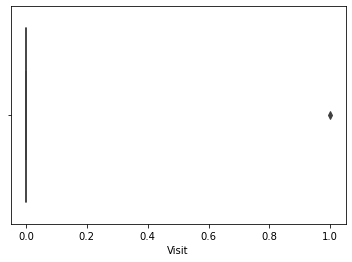

In [21]:
for i in df.columns:
    plt.tight_layout()
    sns.boxplot(df[i])
    plt.show()
    
#No outliers detected

In [22]:
#We can use Breusch pagan test to check for autocorrelation within the data but for simplicity lets assume it to be non existant


In [23]:
#The major assumptions for our linear model are met
#Absence of --> outliers,heteroscedasticity,multicollinearity,autocorrelation in the data
#Thus we can try Logistic Regression to help in this binary classification task as our base model

In [24]:
df.head()
X=df.drop("FeedBack",axis=1)
y=df["FeedBack"]

#Separating independent and target variables
y.value_counts()# Data is roughly balanced

1    36
0    30
Name: FeedBack, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score #Since we have less data its good to use cross val than train test split
log=LogisticRegression()
cross_val_score(log,X,y,scoring="f1",cv=5)


array([0.85714286, 1.        , 0.92307692, 0.72727273, 0.92307692])

In [26]:
(cross_val_score(log,X,y,scoring="f1",cv=5)).mean()
#We choose f1 score as evaluation metrics over accuracy as it gives us estimate of 
#how well the model is able to predict both the classes

#Lets check precision and recall for this
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=10)
model1=log.fit(xtrain,ytrain)
preds1=model1.predict(xtest)
print(f1_score(ytest,preds1))
print(classification_report(ytest,preds1))

# As we have seen precision and recall fluctuate by a margin of roughly 10% and f1 score by  margin of 2%
#It maybe because of little data.But f1 score is good enough.
#Lets try a more complex model


0.9333333333333333
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [27]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=10)
model2=gnb.fit(xtrain,ytrain)
preds2=model2.predict(xtest)
print(f1_score(ytest,preds2))
print(classification_report(ytest,preds2))

#Same results


0.9333333333333333
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=10)
model3=rf.fit(xtrain,ytrain)
preds3=model3.predict(xtest)
print(f1_score(ytest,preds3))
print(classification_report(ytest,preds3))

#Random forest helped us deal with less data and 
#Random forest works because it combines several weak learners parallely and takes mode of their individual output
#It also helps avoid overfitting(a problem in Decision trees) as instead of building forest on all predictors
#it considers just a random subset of it

0.6666666666666667
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.54      0.88      0.67         8

    accuracy                           0.59        17
   macro avg       0.64      0.60      0.56        17
weighted avg       0.65      0.59      0.56        17



In [29]:
#Lets try 1 last boosting model that should work better. Being an ensemble it also combines several weak learners 
#but in a sequential way such that all learners have different voice in determining the output based on their assigned weights
import xgboost as xgb
xg=xgb.XGBClassifier()
model4=xg.fit(xtrain,ytrain)
preds4=model4.predict(xtest)
print(f1_score(ytest,preds4))
print(classification_report(ytest,preds4))
#Worse results

0.6666666666666667
              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.54      0.88      0.67         8

    accuracy                           0.59        17
   macro avg       0.64      0.60      0.56        17
weighted avg       0.65      0.59      0.56        17



In [30]:
#Thus the basic Logistic regression and Gaussian naive bayes model performed best.

# Question.1.
Consider a joint distribution table between the three binary variables,
i. ) showing that there exists an ordered numbering of the nodes and for each node there are no such
links going to a low-numbered node which also explains that there is no directed cycle within a
directed graph.
a b c p(a,b,c)
0 0 0 0.192
0 0 1 0.144
0 1 0 0.048
0 1 1 0.216
1 0 0 0.192
1 0 1 0.064
1 1 0 0.048
1 1 1 0.096
ii.) Also, show that when the variable a and b will be marginally dependent and when they will be
independent.
iii.) Evaluate the distribution p(a), p(c|a), and, p(b|c) corresponding to the table. Plot a corresponding
directed graph. Hence show p(a|b|c) = p(a)p(c|a)p(b|c).

In [33]:
jdt=pd.DataFrame({"a":[0,0,0,0,1,1,1,1],"b":[0,0,1,1,0,0,1,1],"c":[0,1,0,1,0,1,0,1],"p(a,b,c)":[0.192,0.144,0.048,0.216,0.192,0.064,0.048,0.096]})
jdt

,a,b,c,"p(a,b,c)"
0,0,0,0,0.192
1,0,0,1,0.144
2,0,1,0,0.048
3,0,1,1,0.216
4,1,0,0,0.192
5,1,0,1,0.064
6,1,1,0,0.048
7,1,1,1,0.096


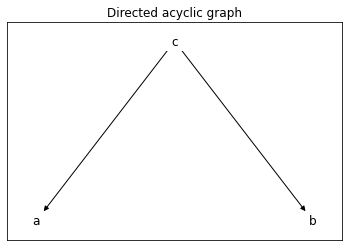

In [41]:
import networkx as nx
G = nx.DiGraph()
nodes = np.arange(0, 3).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(2,0), (2,1)])
pos = {2:(10, 10),0:(8.5, 8.5), 1:(11.5, 8.5)}
labels = {0:"a",1:"b", 2: "c"}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,node_shape = "s", node_color = "white")
plt.title("Directed acyclic graph")
plt.savefig("Directed acyclic graph using networkx.jpeg",dpi = 300)
plt.show()

#The followinng is a directed graph in which we have edges indicating directions of dependency of one node on the other.

#This graph shows three nodes a,b,c with c being the parent node on which a and b(child nodes) depend.

#This directed graph is acyclic i.e. it has no cycles within it. It means going by Depth First search, there is no route through
#which we can start and end at the same node.
#For example If we start from c we can visit b but b does not have any new neighbour except c which is the parent, 
#so the cycle doesnt exist for c

#Similarly for a and b, if we start from any one of these nodes we cannot move forward because they have edges directed towards them.

#Thus there is no directed cycle within this directed graph

In [61]:
#Two variables are marginally independent if the following equation satisfies:
#                     P(X|Y)=P(X)
#This is to say that knowing the value of Y does not change our belief about X.
#For example fire alarm will get triggered given there is smoke. However, given a particular brand of cigarette our
#belief about fire alarm will not change since its dependent on smoke and not on brand of cigarette.

#Marginal dependence will occur when following equation satisfies:
#              P(X|Y)=P(X,Y)/P(Y)
#This means knowledge of Y influences our belief about X

# If a=0,b=0
pab=jdt.loc[(jdt["a"]==0)&(jdt["b"]==0),"p(a,b,c)"].sum(axis=0)
pb=jdt.loc[jdt["b"]==0,"p(a,b,c)"].sum(axis=0)
pa=jdt.loc[jdt["a"]==0,"p(a,b,c)"].sum(axis=0)

a_given_b=pab/pb  #P(a|b)

a_given_b==pa  #Result is False   # Therefore in this case both variables are marginally dependent

#a and b will be marginally dependent when our knowledge of b does not affect our knowledge of a
#              p(a|b)=p(a)
#That is to say marginal probability of a is same as conditional probability of a given b.


False

In [85]:
marg_prob_a=pd.DataFrame({"a=0":[jdt.loc[(jdt["a"]==0),"p(a,b,c)"].sum(axis=0)],"a=1":[jdt.loc[(jdt["a"]==1),"p(a,b,c)"].sum(axis=0)]})
marg_prob_a

,a=0,a=1
0,0.6,0.4


In [84]:
cond_c_given_a=pd.DataFrame({"a=0":[0.24,0.36],"a=1":[0.24,0.16]},index=["c=0","c=1"],columns=["a=0","a=1"])
cond_c_given_a

,a=0,a=1
c=0,0.24,0.24
c=1,0.36,0.16


In [87]:
cond_b_given_c=pd.DataFrame({"c=0":[0.384,0.096],"c=1":[0.208,0.312]},index=["b=0","b=1"],columns=["c=0","c=1"])
cond_b_given_c

,c=0,c=1
b=0,0.384,0.208
b=1,0.096,0.312


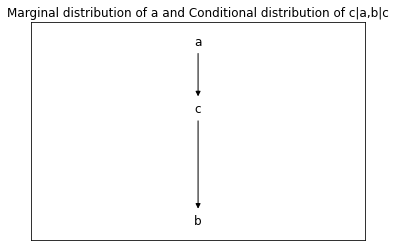

In [93]:
G = nx.DiGraph()
nodes = np.arange(0, 3).tolist()
G.add_nodes_from(nodes)
G.add_edges_from([(0,2), (2,1)])
pos = {0:(10, 10),2:(10, 8.5), 1:(10, 6)}
labels = {0:"a",1:"b", 2: "c"}
nx.draw_networkx(G, pos = pos, labels = labels, arrows = True,node_shape = "s", node_color = "white")
plt.title("Marginal distribution of a and Conditional distribution of c|a,b|c")
plt.savefig("Directed acyclic graph using networkx.jpeg",dpi = 300)
plt.show()


In [ ]:
jdt
#p(a|b|c) = p(a)p(c|a)p(b|c)

#LHS p(a|b|c) = P(a)P(c∩a)P(b∩c)/P(c)P(a)=P(c∩a)P(b∩c)/P(c)

#RHS p(a)*p(c,a)/p(a)*p(b,c)/p(c)=p(c,a)*p(b,c)/p(c) =p(c∩a)p(b∩c)/p(c)

#Thus LHS=RHS
# p(a|b|c) = p(a)p(c|a)p(b|c)
#Hence proved
